# Code With Us Demo

In this notebook, we will provide the ability to run an ICF cadCAD model. Below we provide an overview of cadCAD and the model process.

## cadCAD Model Structure Overview 
In the cadCAD simulation methodology, we operate on four layers: Policies, Mechanisms, States, and Metrics. Information flows do not have explicit feedback loop unless noted. Policies determine the inputs into the system dynamics, and can come from user input, observations from the exogenous environment, or algorithms. Mechanisms (sometimes referred to as State Update Logic) are functions that take the policy decisions and update the States to reflect the policy level changes. States are variables that represent the system quantities at the given point in time, and Metrics are computed from state variables to assess the health of the system, essentially views on a complex data structure. Metrics can often be thought of as Key Performance Indicators (KPIs).

At a more granular level, to setup a model, there are system conventions and configurations that must be followed.

The way to think of cadCAD modeling is analogous to machine learning pipelines which normally consist of multiple steps when training and running a deployed model. There is preprocessing, which includes segregating features between continuous and categorical, transforming or imputing data, and then instantiating, training, and running a machine learning model with specified hyperparameters. cadCAD modeling can be thought of in the same way as states, roughly translating into features, are fed into pipelines that have built-in logic to direct traffic between different mechanisms, such as scaling and imputation. Accuracy scores, ROC, etc. are analogous to the metrics that can be configured on a cadCAD model, specifying how well a given model is doing in meeting its objectives. The parameter sweeping capability of cadCAD can be thought of as a grid search, or way to find the optimal hyperparameters for a system by running through alternative scenarios. A/B style testing that cadCAD enables is used in the same way machine learning models are A/B tested, except out of the box, in providing a side by side comparison of muliple different models to compare and contrast performance. Utilizing the field of Systems Identification, dynamical systems models can be used to "online learn" by providing a feedback loop to generative system mechanisms.

cadCAD models are micro founded with metrics being at the macro or the institutional level. If you are interested in institutional dynamics, see Dr. Zargham's recent paper: [Voshmgir, Shermin and Zargham, Michael (2019) Foundations of Cryptoeconomic Systems. Working Paper Series / Institute for Cryptoeconomics / Interdisciplinary Research, 1. Research Institute for Cryptoeconomics, Vienna.](https://epub.wu.ac.at/7309/8/Foundations%20of%20Cryptoeconomic%20Systems.pdf)



### Model File structure
* Code With Us.ipynb
* src/sim
* src/sim/model
* src/sim/model/parts

In the sim folder there exist 3 files and a model folder, the [config.py](src/sim/config.py), [run.py](src/sim/run.py), and [sim_setup.py](src/sim/sim_setup.py). The [config.py](src/sim/config.py) contains the simulation configurations, aggregating the partial states, and the state variables. [run.py](src/sim/run.py) actually runs the simulation, and [sim_setup.py](src/sim/sim_setup.py) defines the number of timesteps and monte carlo runs (these 12 simulations have 100 timesteps and no monte carlo runs). 

Within the src/sim/model folder, there are 3 files and a parts folder. The [partial_state_update_block.py](src/sim/model/partial_state_update_block.py) contains the partial state update blocks and how they update the state variables. [state_variables.py](src/sim/model/state_variables.py) defines the state variables and [state_variables.py](src/sim/model/state_variables.py). [sys_params.py](src/sim/model/sys_params.py) specifies hyperparameters for the simulation.


The mechanisms of the model live within the parts subfolder as:
* [attest.py](src/sim/model/parts/attest.py)
* [bondburn.py](src/sim/model/parts/bondburn.py)
* [choose_action.py](src/sim/model/parts/choose_action.py)
* [choose_agent.py](src/sim/model/parts/choose_agent.py)
* [monthly_instalment.py](src/sim/model/parts/monthly_instalment.py)
* [private_beliefs.py](src/sim/model/parts/private_beliefs.py)
* [put_agent_back_to_df.py](src/sim/model/parts/put_agent_back_to_df.py)
* [uniswap.py](src/sim/model/parts/uniswap.py)
* [utils.py](src/sim/model/parts/utils.py)


## Model Diagram

![model](images/Phase_3_secondary.png)


In order to reperform this code, we recommend the researcher use the following link https://www.anaconda.com/products/individual to download Python 3.7. To install the specific version of cadCAD this repository was built with, run the following code: pip install cadCAD==0.4.23

Then run cd InterchainFoundation to enter the repository. Finally, run jupyter notebook to open a notebook server to run the various notebooks in this repository.

### Installed cadCAD Installed Version Check

In [1]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


## Parametric testing of the initialization of the Bonding Curve


### The specific simulation of the model is as follows:

* 10 agents
* 14 days where each day each participant gets 1xCHF
* Each day the 10 participants all buy tokens on the boding curve with their 1xCHF
* Ffter 14 days the bond closes because the project is over (succeeds)
* Because the project wasn't actually spending any funds, the total amount of reward will in fact be the C + reserve


* Bond token: uFIT (micro FIT)
* Reserve token: uXCHF (micro XCHF)
* C (Outcome payment): 300000000 [uxchf]
* d0: 1000000
* p0: 1
* theta: 0
* kappa: 3.0
* max supply: 20000000 [ufit]

### Import Libraries for Analysis and Visualization

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Import Parent cadCAD Model and Utilities

In [3]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [4]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{'N': 1,
 'T': range(0, 140),
 'M': {'starting_kappa': 3,
  'starting_alpha': 0.5,
  'money_raised': 1000000,
  'monthly_instalment': 0,
  'C': 300000000,
  'f': 0.03,
  'm': 0.15,
  'beta': 0.9,
  'dust': 1e-08,
  'period': 1200,
  'rules_price': 'martin',
  'E': 0.2,
  'ENABLE_CONTINUOUS': True,
  'THETA': 0,
  'ENABLE_BURN': False,
  'fee_numerator': 997,
  'fee_denominator': 1000,
  'alpha_bias': 1,
  'price_bias': 1,
  'kappa_rule': 'none',
  'alpha_test': 'success'}}

In [5]:
## Choose a parameter values
update_params = {
    # disable selling
    'ENABLE_BURN' : [False],
    'THETA' : [0],
    'alpha_test' : ['success'],
#     'alpha_test' : ['failure'],
}

### Update Timesteps, if desired
Current Number of TImesteps

In [6]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
# New_Timesteps = range(365)
New_Timesteps

range(0, 140)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [7]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [8]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

### Get Initial Conditions from Config

In [9]:
initial_state = parametric_experiment.get_initial_conditions()
initial_state

{'reserve': 1000000,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 3.0,
 'supply': 1000000,
 'alpha': 0.0033333333333333335,
 'alpha_bar': 0.0033333333333333335,
 'supply_0': 1,
 'supply_1': 1,
 'supply_free': 999998,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 100,
 'invariant_V': 1000000000000.0,
 'invariant_I': 151000000.0,
 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0   0                     0                     0            100   
 1   1                     0                     0            100   
 
    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
 0               0               0                  0                  0.5   
 1               0               0                  0                  0.5   
 
    agent_private_price  agent_private_alpha_signal  \
 0                  0.5                           0   
 1                  0.5                           0   
 
    agen

### Update Agents

#### Choose Number of Agents

In [10]:
number_of_agents = 10

In [11]:
########## AGENT INITIALIZATION ##########
PRIVATE_ALPHA = 0.5
PRIVATE_PRICE = 0.5

r = 0 #1000000  # Agent reserve, the amount of fiat tokens an agent starts with
s = 0
s1 = 0
s0 = 0
s_free = s - (s1+s0)
# Configure agents for agent-based model
agents_df = pd.DataFrame({
    'agent_attestations_1': 0,
    'agent_attestations_0': 0,
    'agent_reserve': r,
    'agent_supply_1': s1,
    'agent_supply_0': s0,
    'agent_supply_free': s_free,
    'agent_private_alpha': PRIVATE_ALPHA,
    'agent_private_price': PRIVATE_PRICE,    
    'agent_private_alpha_signal': 0,
    'agent_private_price_signal': 0,
    'agent_public_alpha_signal': 0,
    'agent_public_price_signal': 0}, index=[0])
agents_df = pd.concat([agents_df]*number_of_agents, ignore_index=True)
# Adding IDs to agents
agents_df.insert(0, 'id', range(0, len(agents_df)))

# vary agent reserves
# agents_df['agent_reserve'] = 1000000 #[round(num, 2) for num in list(np.random.uniform(1000000,7000000,10))]
agents_df['agent_private_alpha'] = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# vary agent private price
agents_df['agent_private_price'] = 100 # [round(num, 2) for num in list(np.random.uniform(0.4,0.9,10))]



In [12]:
## see initialized values
agents_df[['agent_reserve','agent_private_price']]

,agent_reserve,agent_private_price
0,0,100
1,0,100
2,0,100
3,0,100
4,0,100
5,0,100
6,0,100
7,0,100
8,0,100
9,0,100


### Update Agent into Initial State

In [13]:
initial_state['agents'] = agents_df

### Re-Instantiate Config with Updated Initial Conditions

In [14]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [15]:

del configs[:]

parametric_experiment.append()

In [16]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 140),
  'M': {'starting_kappa': 3,
   'starting_alpha': 0.5,
   'money_raised': 1000000,
   'monthly_instalment': 0,
   'C': 300000000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none',
   'alpha_test': 'success'}}]

### Generate config_ids to match results with swept variable input

In [17]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

### Execute cadCAD Simulation

In [18]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (140, 21, 1, 19)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.20s


In [19]:
experiments.head()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,invariant_V,invariant_I,agents,chosen_agent,public_alpha,simulation,subset,run,substep,timestep
0,0,1000000.00,1.000000,0,1.000000,3.000000,1.000000e+06,0.003333,0.003333,1,...,1.000000e+12,1.510000e+08,id agent_attestations_1 agent_attestation...,0,0,0,0,1,0,0
1,5,1999999.99,3.847322,0,3.847322,2.875767,1.259921e+06,0.006523,0.003333,1,...,1.746366e+11,3.000000e+06,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,1
2,10,2999999.98,5.241804,0,5.241804,2.935432,1.450695e+06,0.010894,0.003333,1,...,4.071628e+11,4.956800e+06,id agent_attestations_1 agent_attestatio...,"{'id': 1.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,2
3,15,3999999.97,6.694655,0,6.694655,3.612606,1.600068e+06,0.017521,0.003333,1,...,6.472112e+15,7.268190e+06,id agent_attestations_1 agent_attestatio...,"{'id': 2.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,3
4,20,4999999.96,9.808803,0,9.808803,2.509925,1.702017e+06,0.020567,0.003333,1,...,8.715313e+08,1.025629e+07,id agent_attestations_1 agent_attestatio...,"{'id': 3.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,4


In [20]:
experiments.tail()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,invariant_V,invariant_I,agents,chosen_agent,public_alpha,simulation,subset,run,substep,timestep
136,680,136999999.9,44.390793,0,44.390793,2.120151,6.516687e+06,0.506856,0.003333,1,...,2.041948e+06,2.878036e+08,id agent_attestations_1 agent_attestatio...,"{'id': 5.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,136
137,685,137999999.9,44.657620,0,44.657620,2.109777,6.539080e+06,0.508582,0.003333,1,...,1.735179e+06,2.900568e+08,id agent_attestations_1 agent_attestatio...,"{'id': 6.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,137
138,690,138999999.9,44.609210,0,44.609210,2.107045,6.561497e+06,0.510646,0.003333,1,...,1.662338e+06,2.915746e+08,id agent_attestations_1 agent_attestatio...,"{'id': 7.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,138
139,695,139999999.9,44.720260,0,44.720260,2.108391,6.583858e+06,0.513778,0.003333,1,...,1.697842e+06,2.931938e+08,id agent_attestations_1 agent_attestatio...,"{'id': 8.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,139
140,700,140999999.9,44.917131,0,44.917131,2.111714,6.606121e+06,0.517911,0.003333,1,...,1.788775e+06,2.951334e+08,id agent_attestations_1 agent_attestatio...,"{'id': 9.0, 'agent_attestations_1': 0.0, 'agen...",0,0,0,1,5,140


/home/aclarkdata/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


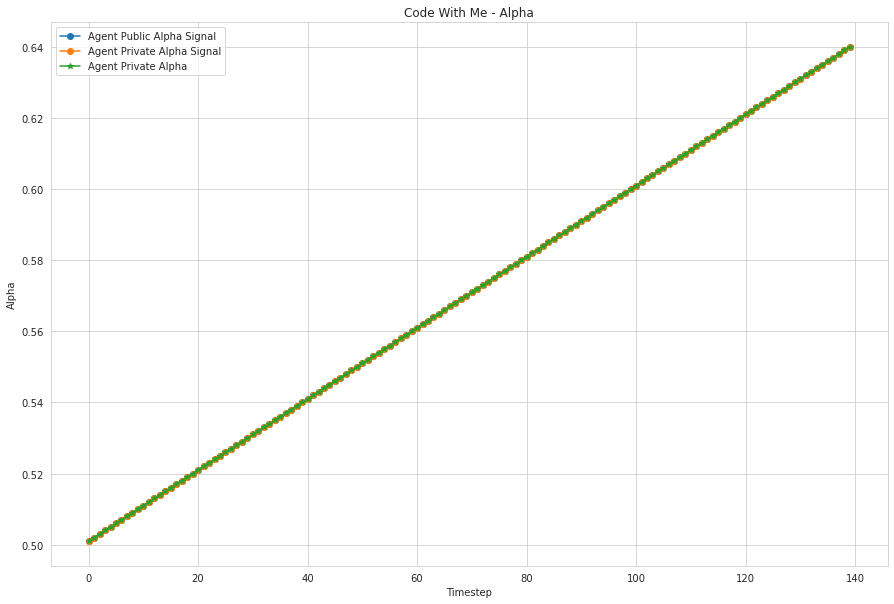

In [21]:
from src.sim.model.parts.utils import *

alpha_plot(experiments,'Code With Me - Alpha',len(New_Timesteps))

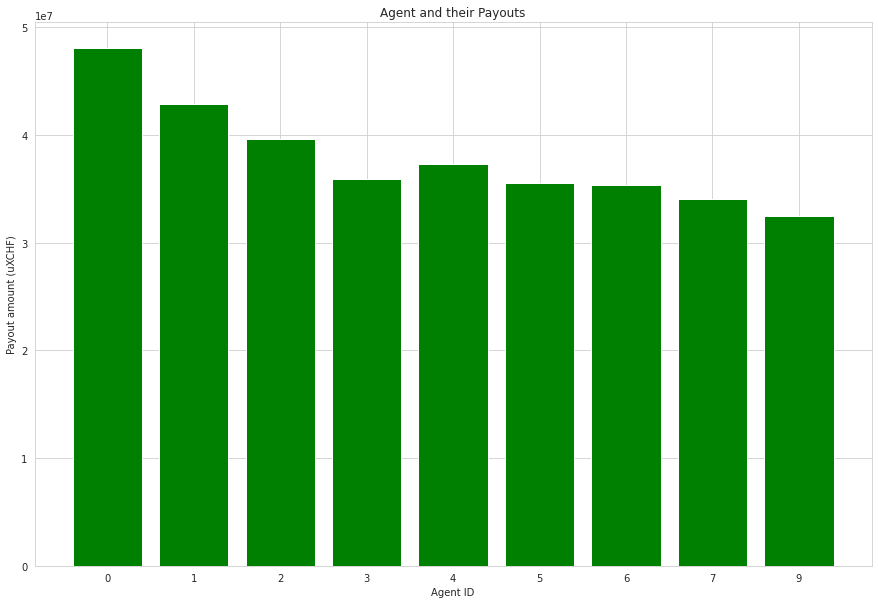

In [22]:
agent_payout(experiments,len(New_Timesteps))

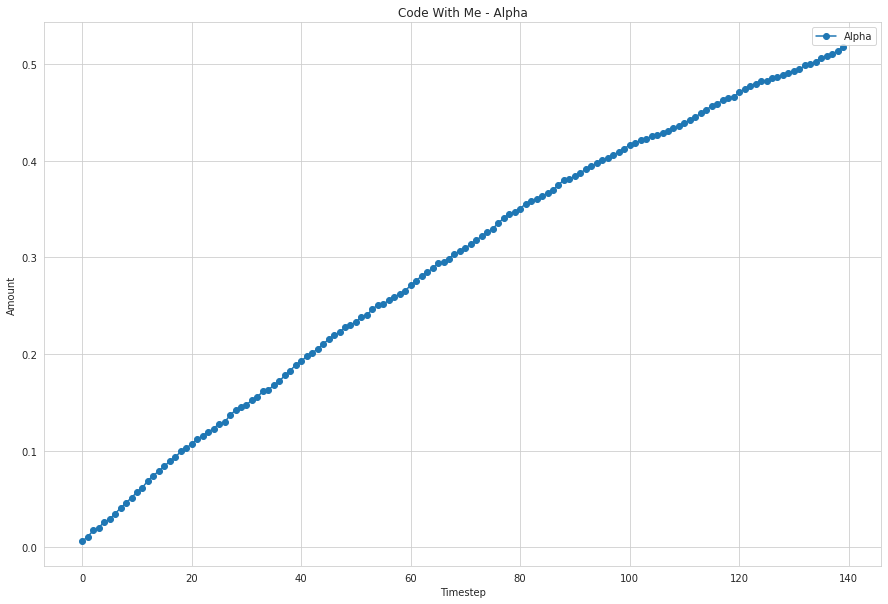

In [23]:
alpha(experiments,'Code With Me - Alpha', len(New_Timesteps))

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


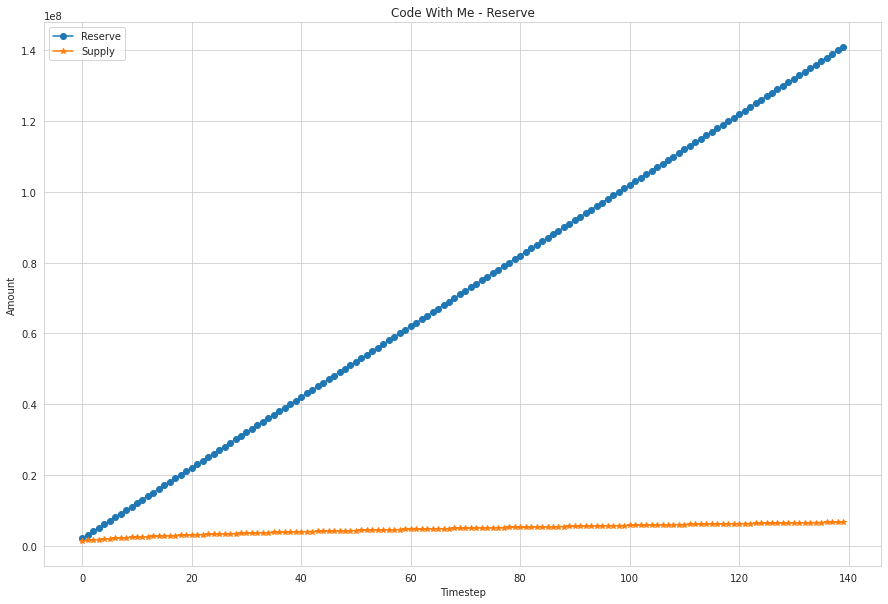

In [24]:
reserve_supply(experiments,'Code With Me - Reserve',len(New_Timesteps))

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


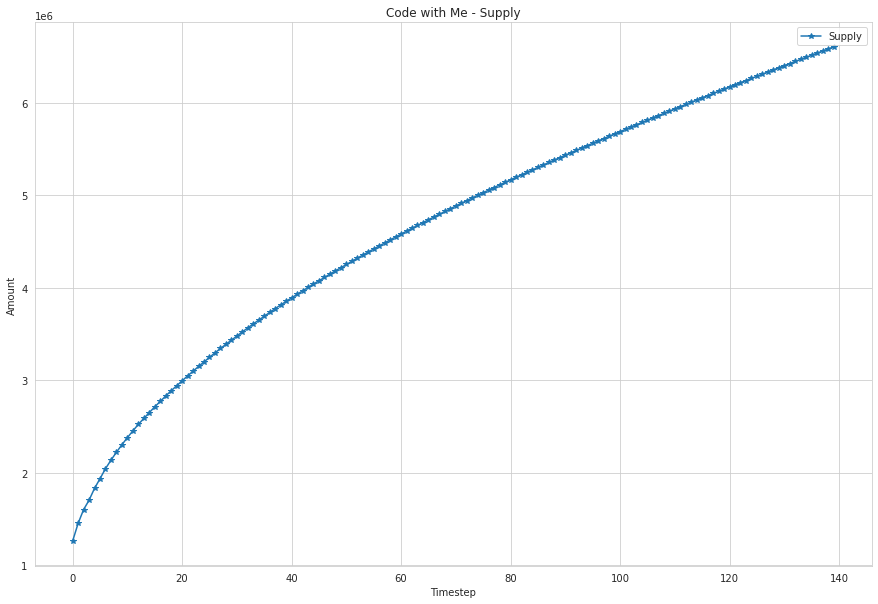

In [25]:
supply_plot(experiments,'Code with Me - Supply',len(New_Timesteps))

/home/aclarkdata/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


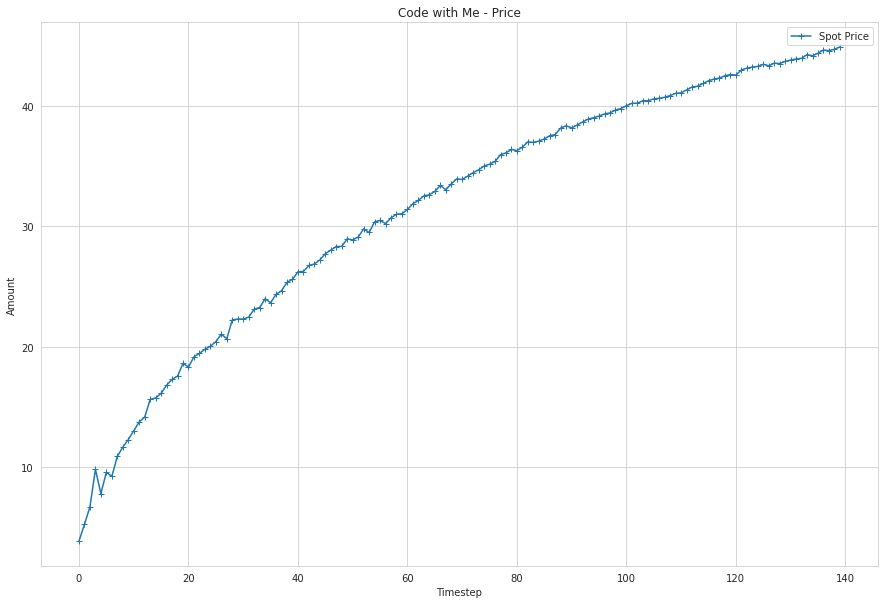

In [26]:
price(experiments,'Code with Me - Price',len(New_Timesteps))

## Conclusion

In this notebook, we have provided the ability for users to visualize a bonding curve implementation in action, and play around with the parameters.